# Lab work №2

### `Task 1:`

Let's build graphs of functions. The selected range of x values ​​is from 0 to 20.

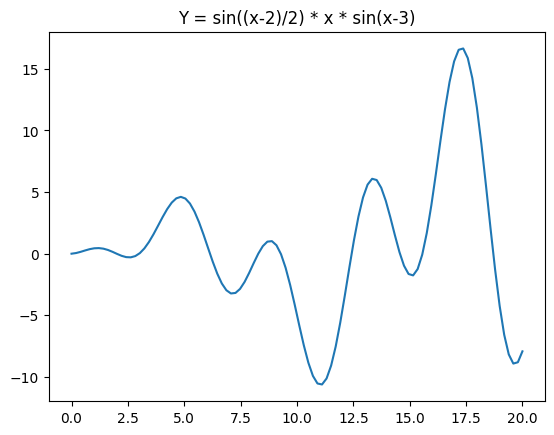

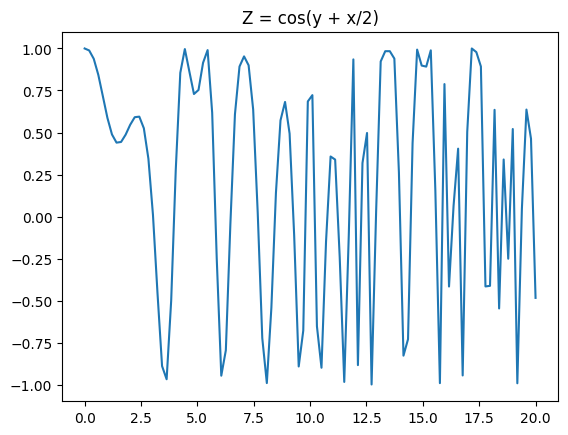

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
import skfuzzy as fuzz 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import tabulate as tabulate

x_range = np.linspace(0, 20, 100)
y_func = np.sin((x_range-2)/2)*x_range*np.sin(x_range-3)
z_func = np.cos(y_func+x_range/2)

plt.plot(x_range, y_func)
plt.title("Y = sin((x-2)/2) * x * sin(x-3)")
plt.show()

plt.plot(x_range, z_func)
plt.title("Z = cos(y + x/2)")
plt.show()

Now let's divide the data into intervals according to the number of membership functions: x - 6 intervals, y - 6 intervals, z - 9 intervals.

In [22]:
# Calculate intervals
def calculate_intervals(values, n_intervals): 
    s = min(values)
    e = max(values)
    intervals = []
    val = np.linspace(s, e, n_intervals + 1) 
    for i in range(n_intervals):
        start = val[i] 
        end = val[i + 1]
        ser = (start + end) / 2
        intervals.append([start, ser, end]) 
    return intervals

# Create a function to output the intervals
def print_intervals(intervals, name):
    print('\nBounds of membership functions ' + str(name) + ':') 
    for i in intervals:
        print(i)

# Output the bounds of membership functions:
x_intervals = calculate_intervals(x_range, 6) 
print_intervals(x_intervals, 'x')

y_intervals = calculate_intervals(y_func, 6) 
print_intervals(y_intervals, 'y')

z_intervals = calculate_intervals(z_func, 9) 
print_intervals(z_intervals, 'z')



Bounds of membership functions x:
[0.0, 1.6666666666666667, 3.3333333333333335]
[3.3333333333333335, 5.0, 6.666666666666667]
[6.666666666666667, 8.333333333333334, 10.0]
[10.0, 11.666666666666668, 13.333333333333334]
[13.333333333333334, 15.0, 16.666666666666668]
[16.666666666666668, 18.333333333333336, 20.0]

Bounds of membership functions y:
[-10.613936341819958, -8.341562953166921, -6.069189564513883]
[-6.069189564513883, -3.796816175860846, -1.5244427872078088]
[-1.5244427872078088, 0.7479306014452289, 3.0203039900982667]
[3.0203039900982667, 5.2926773787513035, 7.56505076740434]
[7.56505076740434, 9.837424156057377, 12.109797544710414]
[12.109797544710414, 14.382170933363453, 16.65454432201649]

Bounds of membership functions z:
[-0.9989575810205715, -0.8879043820749842, -0.7768511831293969]
[-0.7768511831293969, -0.6657979841838096, -0.5547447852382223]
[-0.5547447852382223, -0.443691586292635, -0.33263838734704765]
[-0.33263838734704765, -0.22158518840146035, -0.110531989455873

### `Task 2.1:`

Let's create a membership function:

`Triangular membership function`:

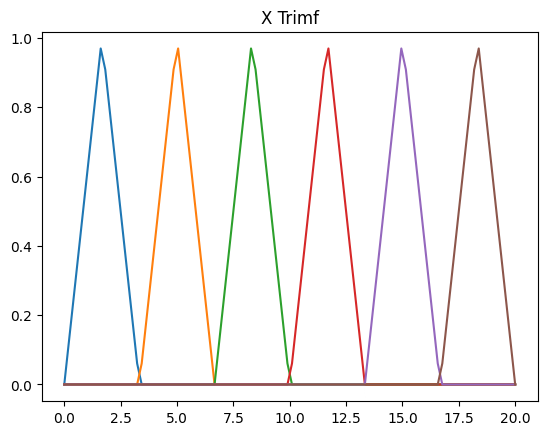

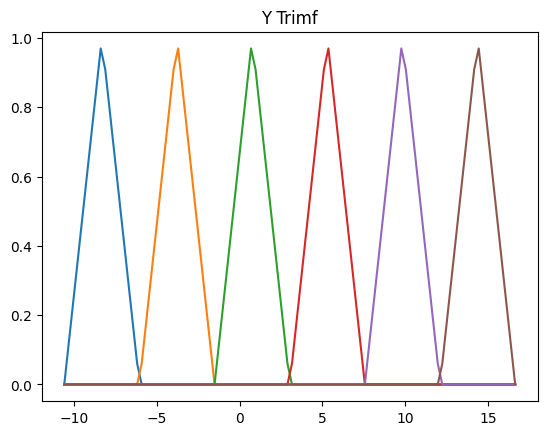

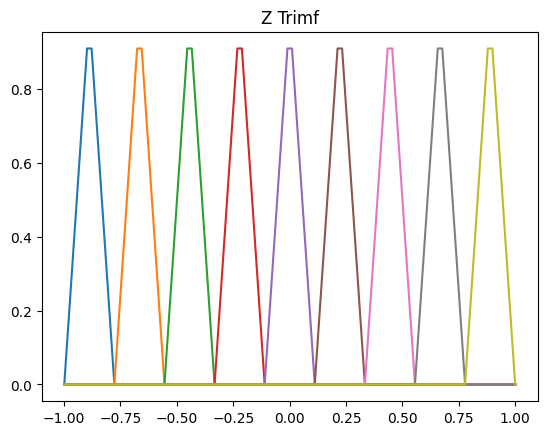

In [23]:
# Create a function to display graphs of membership functions

def show_graphs(space, function, text=""):
    for i in range(len(function)):
        plt.title(text)
        plt.plot(space, function[i])
    plt.show()

graph_x = [fuzz.trimf(x_range, x_intervals[i]) for i in range(6)]
show_graphs(x_range, graph_x, "X Trimf")


y_space = np.linspace(min(y_func), max(y_func), 100)
graph_y = [fuzz.trimf(y_space, y_intervals[i]) for i in range(6)]
show_graphs(y_space, graph_y, "Y Trimf")

z_space = np.linspace(min(z_func), max(z_func), 100)
graph_z = [fuzz.trimf(z_space, z_intervals[i]) for i in range(9)]
show_graphs(z_space, graph_z, "Z Trimf")

Now let's create and display membership tables and rules:


To simplify the process of building a table, we will use the `tabulate` library

In [24]:
from tabulate import tabulate

# Function to compute the values of the membership function
def values_count(x, a, b, c):
    result = 0
    if x >= a and x < b:
        result = (x - a) / (b - a)
    elif x >= b and x <= c:
        result = (c - x) / (c - b)
    return result

# Function to find the index of the best value
def best_value(x, space, step):
    best = float("-inf")
    best_ind = -1
    for i, mid in enumerate(space):
        current_trimf_value = values_count(x, mid - step, mid, mid + step)
        if current_trimf_value > best:
            best = current_trimf_value
            best_ind = i
    return best_ind

# Break down the function values into the appropriate number of subintervals
x_trimf_middle = np.linspace(min(x_range), max(x_range), 6)
y_trimf_middle = np.linspace(min(y_func), max(y_func), 6)
z_trimf_middle = np.linspace(min(z_func), max(z_func), 9)

# Output the table of values
print("Value Table:")
table = [["y\\x"] + [str(x) for x in x_trimf_middle]]
for y_value in y_trimf_middle:
    row = [round(y_value, 2)]
    for x in x_trimf_middle:
        z = np.cos(y_value + x / 2)
        row.append(round(z, 2)) 
    table.append(row)

print(tabulate(table, tablefmt="grid"))

# Output the table with function names
rules = {}
print("Table with Function Names:")
table = [["y\\x"] + ["mx" + str(i) for i in range(1, 7)]]
for i in range(6):
    row = ["my" + str(i + 1)]
    for j in range(6):
        z = np.cos(y_trimf_middle[i] + x_trimf_middle[j] / 2)
        best_func = best_value(z, z_trimf_middle, 4)
        row.append("mf" + str(best_func + 1))
        rules[(j, i)] = best_func  # Simultaneously record the values in the rules dictionary for further output
    table.append(row)

print(tabulate(table, tablefmt="grid"))

# Output the rules
print("\nRules:")
for rule in rules.keys():
    print(f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rules[rule] + 1})")


Value Table:
+--------+-------+-------+-------+-------+-------+-------+
| y\x    |  0    |  4    |  8    | 12    | 16    | 20    |
+--------+-------+-------+-------+-------+-------+-------+
| -10.61 | -0.37 | -0.69 |  0.95 | -0.1  | -0.86 |  0.82 |
+--------+-------+-------+-------+-------+-------+-------+
| -5.16  |  0.43 | -1    |  0.4  |  0.67 | -0.95 |  0.13 |
+--------+-------+-------+-------+-------+-------+-------+
| 0.29   |  0.96 | -0.66 | -0.41 |  1    | -0.43 | -0.65 |
+--------+-------+-------+-------+-------+-------+-------+
| 5.75   |  0.86 |  0.11 | -0.95 |  0.68 |  0.38 | -1    |
+--------+-------+-------+-------+-------+-------+-------+
| 11.2   |  0.2  |  0.81 | -0.87 | -0.08 |  0.94 | -0.7  |
+--------+-------+-------+-------+-------+-------+-------+
| 16.65  | -0.58 |  0.98 | -0.23 | -0.79 |  0.89 |  0.05 |
+--------+-------+-------+-------+-------+-------+-------+
Table with Function Names:
+-----+-----+-----+-----+-----+-----+-----+
| y\x | mx1 | mx2 | mx3 | mx4 |

Now let's model the function using the `rules` dictionary and the `best_value` function from the previous point:

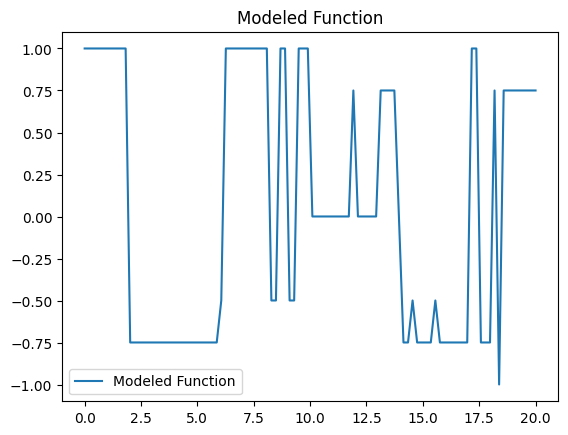

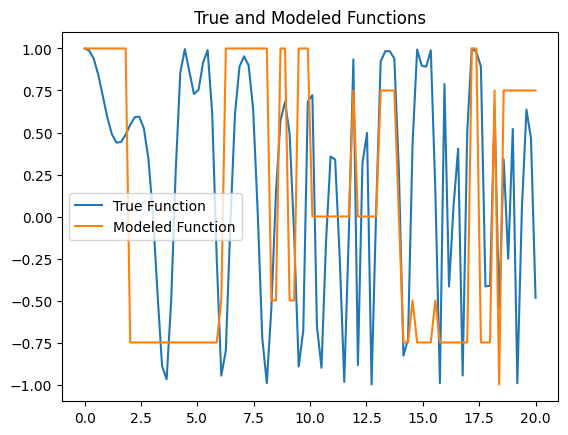

In [25]:
output = []

for x in x_range:
    best_x = best_value(x, x_trimf_middle, 3)
    best_y = best_value(np.sin((x - 2) / 2) * x * np.sin(x - 3), y_trimf_middle, 0.5)
    func = rules[(best_x, best_y)]
    output.append(z_trimf_middle[func])

plt.plot(x_range, output, label="Modeled Function")
plt.title("Modeled Function")
plt.legend()
plt.show()

plt.plot(x_range, z_func, label="True Function")
plt.plot(x_range, output, label="Modeled Function") 
plt.title("True and Modeled Functions")
plt.legend()
plt.show()


Here's how you can calculate the mean squared error and mean absolute error using the `sklearn.metrics` library

In [26]:
# Calculate errors
mse = mean_squared_error(z_func, output)  # Mean Squared Error
mae = mean_absolute_error(z_func, output)  # Mean Absolute Error

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 0.8685
Mean Absolute Error (MAE): 0.7205


### `Task 2.2:`

Let's repeat the same steps for the Gaussian membership function

`Gaussian membership function:`

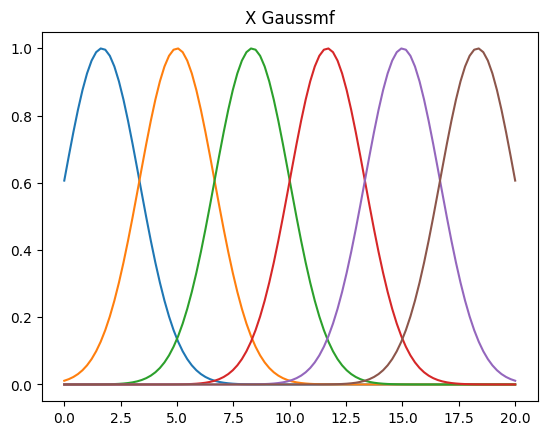

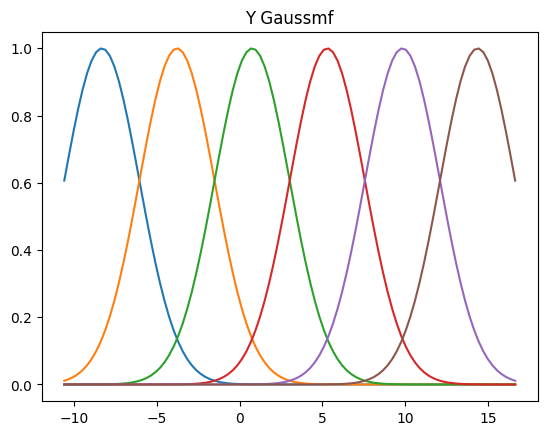

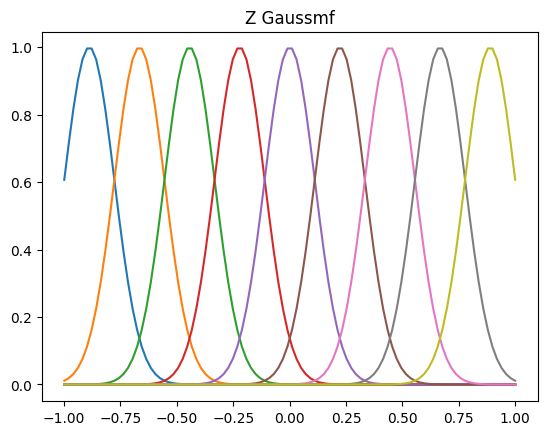

In [27]:
sigma_x = (max(x_range) - min(x_range))/12
graph_x = [fuzz.gaussmf(x_range, x_intervals[i][1], sigma_x) for i in range(6)]
show_graphs(x_range, graph_x, "X Gaussmf")

sigma_y = (max(y_func) - min(y_func))/12
graph_y = [fuzz.gaussmf(y_space, y_intervals[i][1], sigma_y) for i in range(6)]
show_graphs(y_space, graph_y, "Y Gaussmf")

sigma_z = (max(z_func) - min(z_func))/18
graph_z = [fuzz.gaussmf(z_space, z_intervals[i][1], sigma_z) for i in range(9)]
show_graphs(z_space, graph_z, "Z Gaussmf")

In [28]:
from tabulate import tabulate

# Divide the values of the functions into the corresponding number of sub-intervals
x_trimf_middle = np.linspace(min(x_range), max(x_range), 6)
y_trimf_middle = np.linspace(min(y_func), max(y_func), 6)
z_trimf_middle = np.linspace(min(z_func), max(z_func), 9)

# Output the values table
print("Values Table:")
table = [["y\\x"] + [str(x) for x in x_trimf_middle]]
for y_value in y_trimf_middle:
    row = [round(y_value, 2)]
    for x in x_trimf_middle:
        z = np.cos(y_value + x / 2)
        row.append(round(z, 2)) 
    table.append(row)

print(tabulate(table, tablefmt="grid"))
        
# Output the function names table
rules = {}
print("Function Names Table:")
table = [["y\\x"] + ["mx" + str(i) for i in range(1, 7)]]
for i in range(6):
    row = ["my" + str(i + 1)]
    for j in range(6):
        z = np.cos(y_trimf_middle[i] + x_trimf_middle[j] / 2)
        best_func = best_value(z, z_trimf_middle, 4)
        row.append("mf" + str(best_func + 1))
        rules[(j, i)] = best_func  # Simultaneously store the values in the rules dictionary for later rule output
    table.append(row)

print(tabulate(table, tablefmt="grid"))

# Output the rules
print("\nRules:")
for rule in rules.keys():
    print(f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rules[rule] + 1})")


Values Table:
+--------+-------+-------+-------+-------+-------+-------+
| y\x    |  0    |  4    |  8    | 12    | 16    | 20    |
+--------+-------+-------+-------+-------+-------+-------+
| -10.61 | -0.37 | -0.69 |  0.95 | -0.1  | -0.86 |  0.82 |
+--------+-------+-------+-------+-------+-------+-------+
| -5.16  |  0.43 | -1    |  0.4  |  0.67 | -0.95 |  0.13 |
+--------+-------+-------+-------+-------+-------+-------+
| 0.29   |  0.96 | -0.66 | -0.41 |  1    | -0.43 | -0.65 |
+--------+-------+-------+-------+-------+-------+-------+
| 5.75   |  0.86 |  0.11 | -0.95 |  0.68 |  0.38 | -1    |
+--------+-------+-------+-------+-------+-------+-------+
| 11.2   |  0.2  |  0.81 | -0.87 | -0.08 |  0.94 | -0.7  |
+--------+-------+-------+-------+-------+-------+-------+
| 16.65  | -0.58 |  0.98 | -0.23 | -0.79 |  0.89 |  0.05 |
+--------+-------+-------+-------+-------+-------+-------+
Function Names Table:
+-----+-----+-----+-----+-----+-----+-----+
| y\x | mx1 | mx2 | mx3 | mx4 | mx5

Let's model the function:

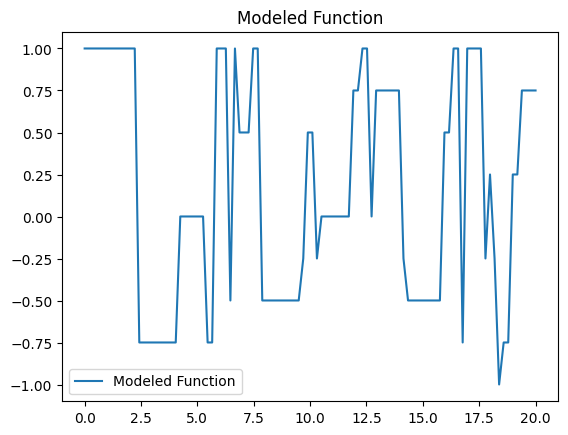

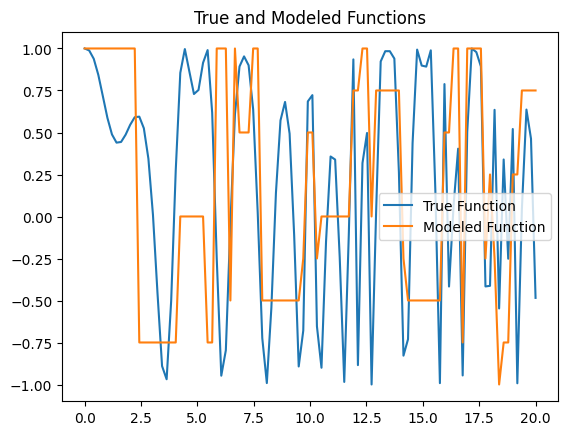

In [29]:
output = []

# Uncomment if you want to filter rules based on specific conditions
# rules2 = dict((key, value) for key, value in rules.items() if key[0] == key[1])

for x in x_range:
    best_x = best_value(x, x_trimf_middle, sigma_x)
    best_y = best_value(np.sin((x - 2) / 2) * x * np.sin(x - 3), y_trimf_middle, sigma_y)
    try: 
        func = rules[(best_x, best_y)]
        output.append(z_trimf_middle[func])
    except KeyError:
        continue  # Skip if the key is not found in the rules

# Plot the modeled function
plt.plot(x_range, output, label="Modeled Function")
plt.title("Modeled Function")
plt.legend()
plt.show()

# Plot both the true function and the modeled function
plt.plot(x_range, z_func, label="True Function")
plt.plot(x_range, output, label="Modeled Function") 
plt.title("True and Modeled Functions")
plt.legend()
plt.show()


Let's calculate the errors:

In [30]:
print("Mean Squared Error (MSE): ", mean_squared_error(z_func, output))
print("Mean Absolute Error (MAE): ", mean_absolute_error(z_func, output))

Mean Squared Error (MSE):  0.5985458381967094
Mean Absolute Error (MAE):  0.6256143790242386
